Dataset Link:    https://archive.ics.uci.edu/ml/datasets/Wholesale+customers#

### Clustering Algorithms 

Article Link:  https://machinelearningmastery.com/clustering-algorithms-with-python/

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
import seaborn as sns

<AxesSubplot:>

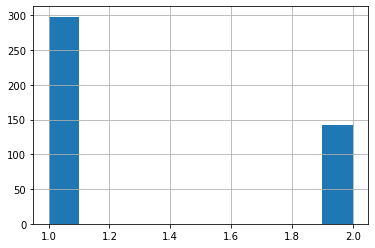

In [11]:
df['Channel'].hist()

<AxesSubplot:>

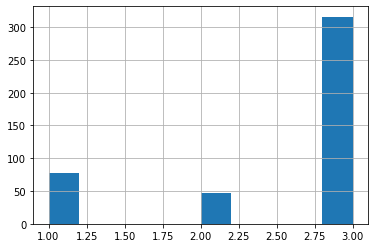

In [12]:
df['Region'].hist()

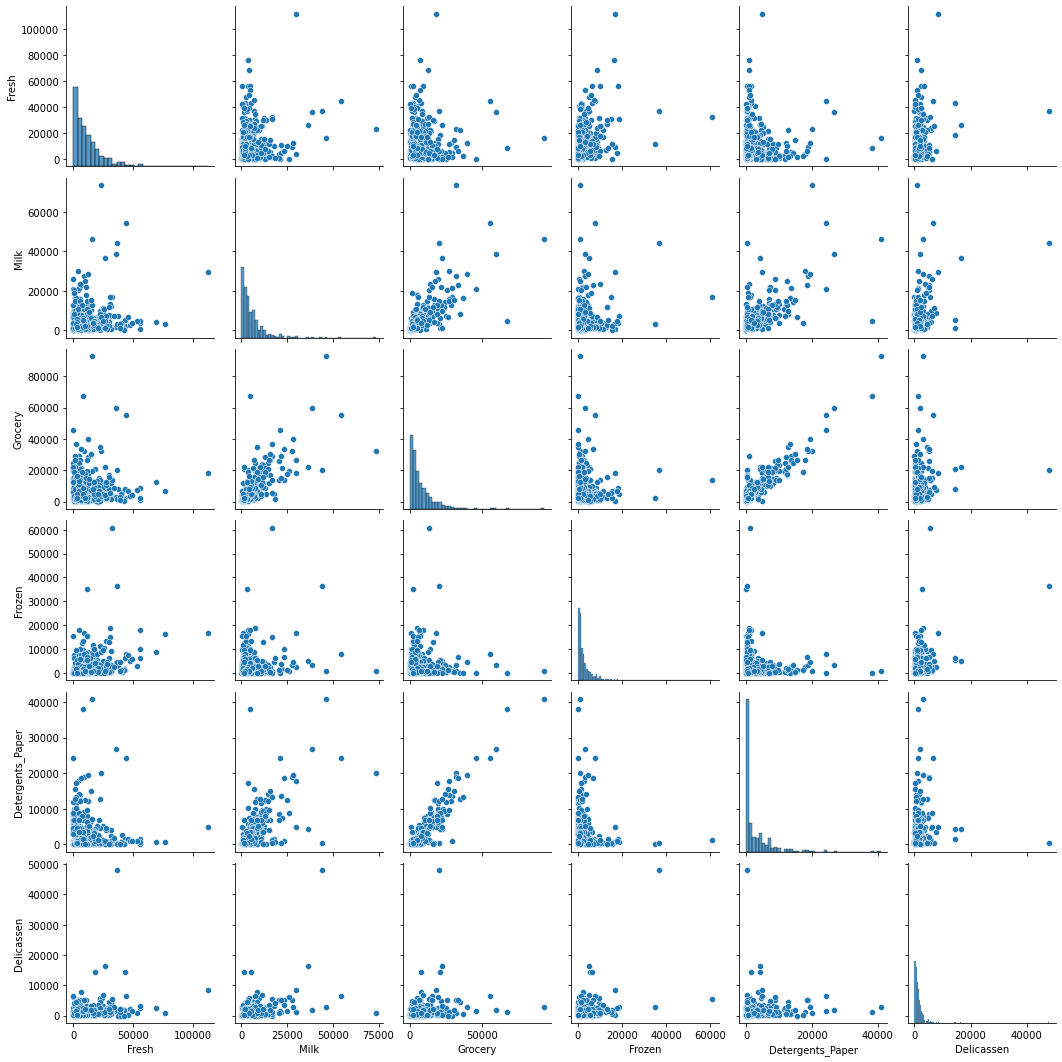

In [14]:
sns.pairplot(df.drop(["Channel","Region"],axis=1))

In [68]:
import numpy as np
y = np.log(df)

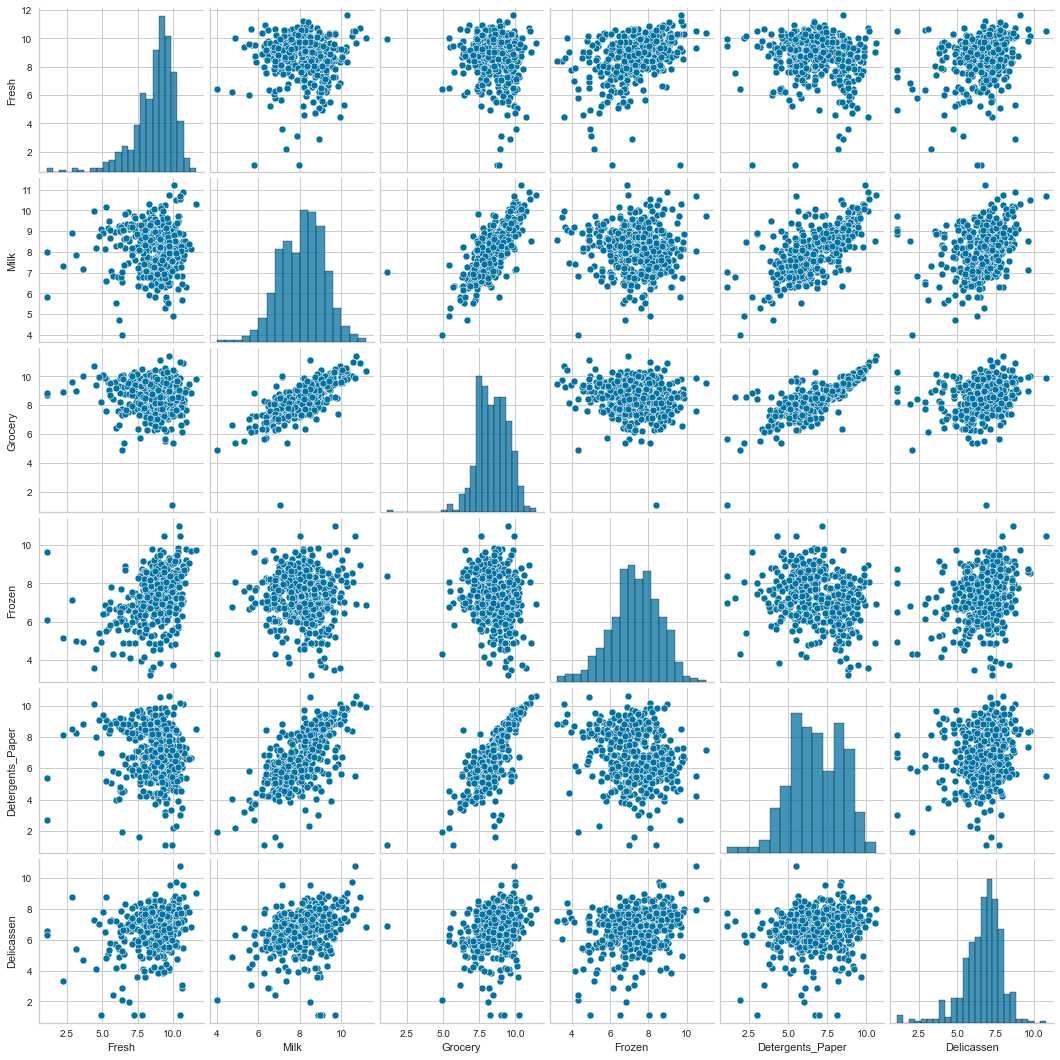

In [81]:
sns.pairplot(y.drop(["Channel","Region"],axis=1))

In [69]:
X = y.values

In [52]:
!pip install yellowbrick

In [70]:
from yellowbrick.cluster import KElbowVisualizer

In [71]:
from sklearn.cluster import KMeans

In [72]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

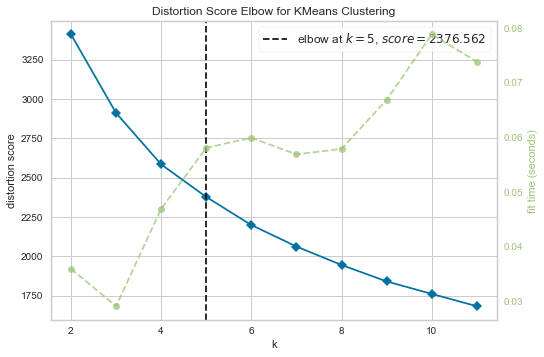

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [73]:
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Affinity Propagation

Number of clusters 32


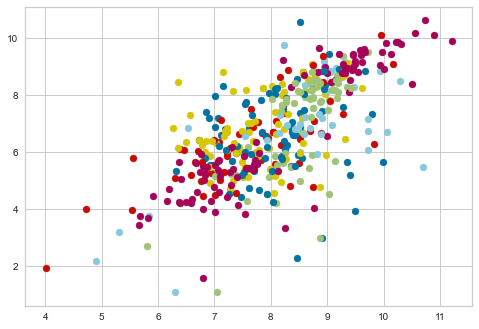

In [74]:
from sklearn.cluster import AffinityPropagation
model = AffinityPropagation(damping=0.9)

model.fit(X)

yhat = model.predict(X)

clusters = unique(yhat)
print("Number of clusters",len(clusters))

for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 3], X[row_ix, 6])
plt.show()

## AgglomerativeClustering

In [75]:
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering

In [93]:
model = AgglomerativeClustering(n_clusters=5)

In [94]:
yhat = model.fit_predict(X)

In [95]:
clusters = unique(yhat)

In [96]:
clusters

array([0, 1, 2, 3, 4], dtype=int64)

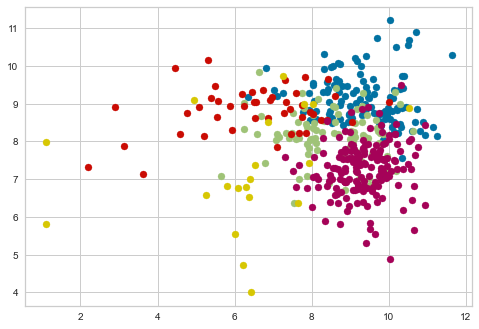

In [97]:
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix,2], X[row_ix,3])
plt.show()

## Birch
BIRCH Clustering (BIRCH is short for Balanced Iterative Reducing and Clustering using
Hierarchies) involves constructing a tree structure from which cluster centroids are extracted

Number of clusters 5


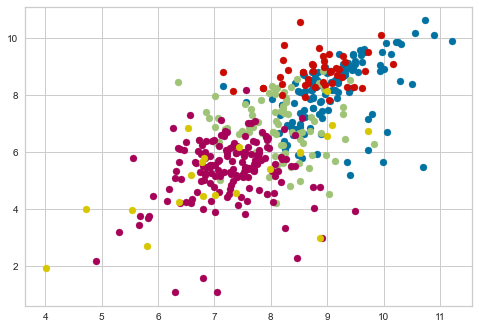

In [98]:
from sklearn.cluster import Birch
model = Birch(threshold=0.01, n_clusters=5)
model.fit(X)
yhat = model.predict(X)

clusters = unique(yhat)
print("Number of clusters",len(clusters))

for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 3], X[row_ix, 6])
plt.show()

## DBSCAN

Number of clusters 1


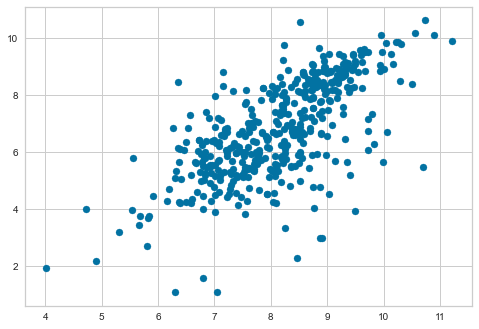

In [107]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.05, min_samples=4)

yhat = model.fit_predict(X)

clusters = unique(yhat)
print("Number of clusters",len(clusters))

for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 3], X[row_ix, 6])
plt.show()

## K-Means

Number of clusters 5


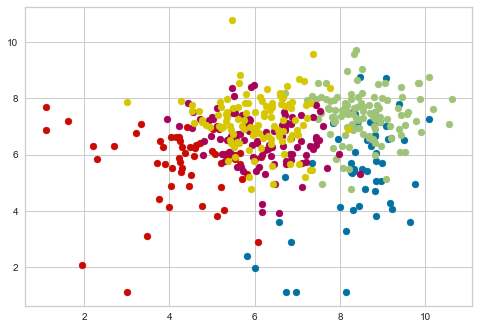

In [111]:
model = KMeans(n_clusters=5)
model.fit(X)
yhat = model.predict(X)

clusters = unique(yhat)
print("Number of clusters",len(clusters))

for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 6], X[row_ix, 7])
plt.show()

## Mini-Batch K-Means

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


Number of clusters 5


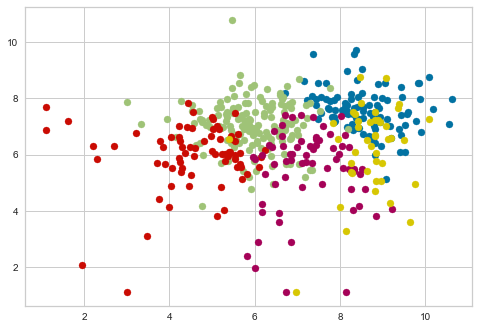

In [119]:
from sklearn.cluster import MiniBatchKMeans

model = MiniBatchKMeans(n_clusters=5)

model.fit(X)
yhat = model.predict(X)

clusters = unique(yhat)
print("Number of clusters",len(clusters))

for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 6], X[row_ix, 7])
plt.show()

## Mean Shift

Number of clusters 6


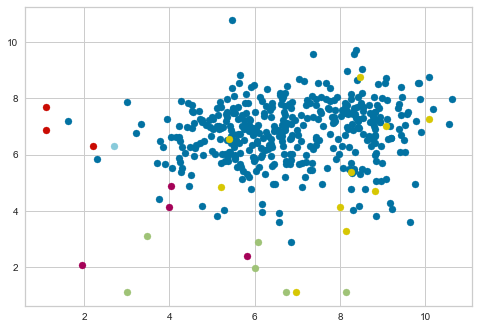

In [120]:
from sklearn.cluster import MeanShift

model = MeanShift()

model.fit(X)
yhat = model.predict(X)

clusters = unique(yhat)
print("Number of clusters",len(clusters))

for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 6], X[row_ix, 7])
plt.show()

## OPTICS

Number of clusters 3


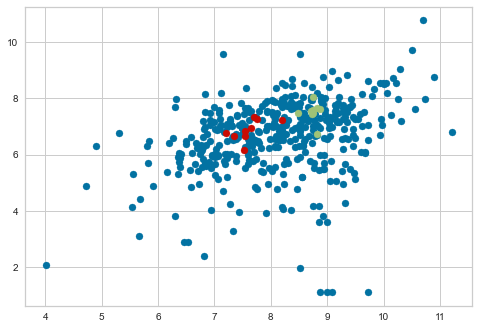

In [124]:
from sklearn.cluster import OPTICS

model = OPTICS(eps=0.007,min_samples=9)


yhat = model.fit_predict(X)

clusters = unique(yhat)
print("Number of clusters",len(clusters))

for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 3], X[row_ix, 7])
plt.show()

## Spectral Clustering

Number of clusters 5


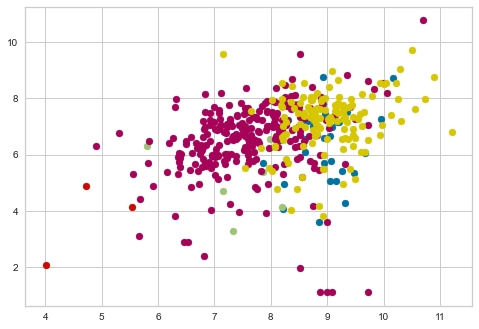

In [130]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=5)


yhat = model.fit_predict(X)

clusters = unique(yhat)
print("Number of clusters",len(clusters))

for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 3], X[row_ix, 7])
plt.show()

## Gaussian Mixture Model

Number of clusters 5


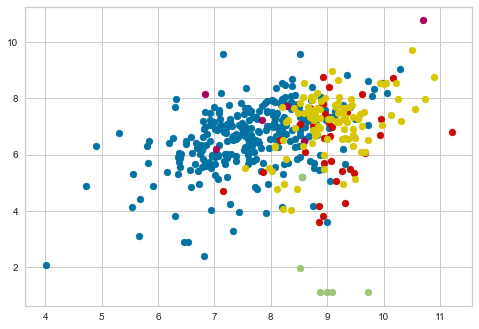

In [132]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=5)


yhat = model.fit_predict(X)

clusters = unique(yhat)
print("Number of clusters",len(clusters))

for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 3], X[row_ix, 7])
plt.show()